In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# initialize variables
n_simulations = 100000

In [4]:
random_epsilon = np.random.normal(0, 1)

In [5]:
random_nu = np.random.uniform(0, 1)

In [6]:
def consumption_growth (epsilon, nu):
    growth = np.exp(0.02 + 0.02*epsilon + nu)
    return growth


In [7]:
def pricing_kernel (growth, gamma):
    return 0.99*growth**(-gamma)

In [8]:
columns = ["epsilon",
           "nu",
           "growth",]

In [9]:
# Create dataframe to store simulation results

Simulation_df = pd.DataFrame(index=range(n_simulations), columns=columns)

Simulation_df["epsilon"] = np.random.normal(0, 1, (n_simulations))

Simulation_df["nu_draw"] = np.random.uniform(0, 1, (n_simulations))

Simulation_df["nu"] = np.where(Simulation_df["nu_draw"] <= 0.017, np.log(0.65), 0)

Simulation_df["growth"] = consumption_growth (Simulation_df["epsilon"], Simulation_df["nu"])


In [10]:
gamma_range = np.arange(1, 4.1, 0.1)

In [11]:
Pricing_Kernel_df = pd.DataFrame(index=range(n_simulations), columns=gamma_range)

for gamma in gamma_range:
    Pricing_Kernel_df.loc[:,gamma] = pricing_kernel (Simulation_df["growth"], gamma)

In [12]:
Pricing_Kernel_transposed_df = Pricing_Kernel_df.T

In [13]:
Pricing_Kernel_transposed_df["mean"]=Pricing_Kernel_transposed_df.mean(axis=1)
Pricing_Kernel_transposed_df["std"]=Pricing_Kernel_transposed_df.std(axis=1)
Pricing_Kernel_transposed_df["volatility_ratio"]=Pricing_Kernel_transposed_df["std"]/Pricing_Kernel_transposed_df["mean"]

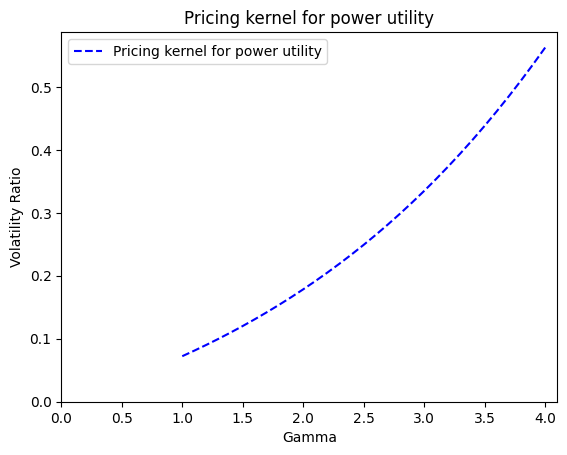

In [14]:
plt.plot( Pricing_Kernel_transposed_df.index, 
         Pricing_Kernel_transposed_df["volatility_ratio"],
         color='blue', 
         linestyle='--', 
         label = "Pricing kernel for power utility")


plt.yticks(np.arange(0, 0.6, 0.1))
plt.xlim(0,4.1)
plt.xlabel('Gamma')
plt.ylabel('Volatility Ratio')
plt.title('Pricing kernel for power utility')
plt.legend()
plt.show()

### Smallest value of γ for which σM/μM > 0.4

In [15]:
# Filter the DataFrame where 'volatility_ratio' > 0.4
filtered_df = Pricing_Kernel_transposed_df[Pricing_Kernel_transposed_df["volatility_ratio"] > 0.4]

# Get the index of the minimum value from the filtered DataFrame
min_index = filtered_df["volatility_ratio"].idxmin()

# Print the formatted index
print(f"Smallest value of  γ for which σM/μM > 0.4: {min_index:.1f}")

Smallest value of  γ for which σM/μM > 0.4: 3.4


According to the Hansen–Jagannathan (H–J) bound, the volatility ratio of pricing kernel cannot be less than the highest sharpe ratio of all possible portfolios.  Considering that the US stock market has a Sharpe ratio of around 0.4, from the Hansen-Jagannthan bound, the volatility ratio (σM/μM) has to be equal to or higher than 0.4 as well, which leads to a minimum gamma value of 3.4. 

 As gamma is the constant coefficient of investor's risk aversion for an investor with power utility of consumption, the economic significance of a gamma value of 3.4 is that assuming that consumption growth grows at 2% a year, the standard deviation of consumption growth is also 2%, disasters happen with a probability of 1.7% and when disasters occur, 35% of optimal consumption is lost, an investor with power utility of consumption should have a risk aversion of 3.4. Accordingly, there is no equity premium puzzle as 3.4 is a reasonable degree of risk aversion.

The possiblity of rare disasters (1.7% chance of happening in any given year), greatly increases volatility and negative (left) skewness of consumption growth and so gamma is much smaller compared with a model that does not take into account the possibility of rare disasters.

Still, σM/μM > 0.4 would mean that the pricing kernel is very volatile, as the value of the standard deviation of the pricing kernel is more than 40% that of the mean value of the pricing kernel.

Accordingly, the intertemporal marginal rate of substitution, which acts as a pricing kernel (or stochastic discount factor) that relates price to final value would also be volatile.
